In [372]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, GRU, Conv1D, MaxPooling1D, Flatten, Dropout

Load your dataset

In [373]:
data = pd.read_csv("4w.csv")

Features and Target variables

In [374]:
features = data[['CF(PCU/min)','CF*2(PCU/min)','%_of_4W','%_of_4W*2']].values

# FOR LCV
# features = data[['CF(PCU/min)','CF*2(PCU/min)','%_of_4W','%_of_4W*2','2W','3W']].values
target = data['SD'].values

Normalize data

In [375]:
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

Split data into train and test sets

In [376]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.15, random_state=42)

Reshape the input data for all models

In [377]:
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

Define, Create and Evaluate Model

In [378]:
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True))
    # model.add(Dropout(0.2))
    model.add(LSTM(48, activation='relu', return_sequences=False))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

lstm_model = create_lstm_model()
lstm_model.fit(X_train_lstm, y_train, epochs=500, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_lstm = lstm_model.predict(X_test_lstm)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)

Epoch 1/500
27/27 [==============================] - 3s 30ms/step - loss: 311.0369 - val_loss: 322.1073
Epoch 2/500
27/27 [==============================] - 0s 6ms/step - loss: 220.7236 - val_loss: 65.1913
Epoch 3/500
27/27 [==============================] - 0s 5ms/step - loss: 50.5812 - val_loss: 50.3104
Epoch 4/500
27/27 [==============================] - 0s 4ms/step - loss: 41.3327 - val_loss: 42.0777
Epoch 5/500
27/27 [==============================] - 0s 4ms/step - loss: 40.3877 - val_loss: 41.3200
Epoch 6/500
27/27 [==============================] - 0s 5ms/step - loss: 39.0865 - val_loss: 43.5730
Epoch 7/500
27/27 [==============================] - 0s 8ms/step - loss: 41.0062 - val_loss: 41.6267
Epoch 8/500
27/27 [==============================] - 0s 5ms/step - loss: 39.6502 - val_loss: 40.6431
Epoch 9/500
27/27 [==============================] - 0s 4ms/step - loss: 40.5566 - val_loss: 42.9793
Epoch 10/500
27/27 [==============================] - 0s 4ms/step - loss: 39.1422 - val

Visualize LSTM results

0.5751379537503323


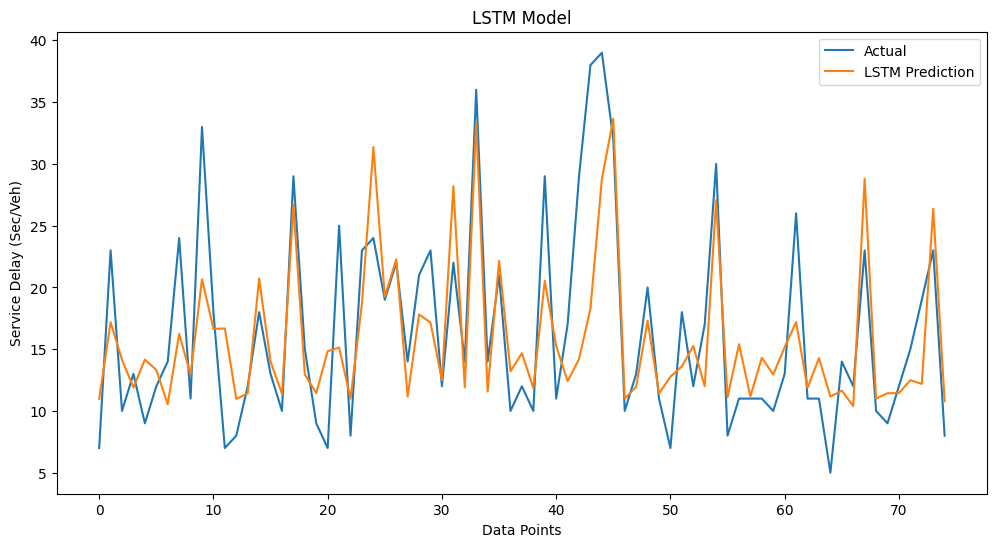

In [379]:
print(r2_lstm)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_lstm, label='LSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('LSTM Model')
plt.show()

In [399]:
def create_bilstm_model():
    model = Sequential()
    model.add(Bidirectional(LSTM(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True)))
    model.add(Bidirectional(LSTM(64, activation='relu', return_sequences=False)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

bilstm_model = create_bilstm_model()
bilstm_model.fit(X_train_lstm, y_train, epochs=500, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_bilstm = bilstm_model.predict(X_test_lstm)
mae_bilstm = mean_absolute_error(y_test, y_pred_bilstm)
mse_bilstm = mean_squared_error(y_test, y_pred_bilstm)
rmse_bilstm=np.sqrt(mse_bilstm)
r2_bilstm = r2_score(y_test, y_pred_bilstm)


Epoch 1/500
14/14 [==============================] - 9s 73ms/step - loss: 309.9740 - val_loss: 320.3364
Epoch 2/500
14/14 [==============================] - 0s 9ms/step - loss: 284.3661 - val_loss: 244.4377
Epoch 3/500
14/14 [==============================] - 0s 9ms/step - loss: 123.0937 - val_loss: 33.2156
Epoch 4/500
14/14 [==============================] - 0s 15ms/step - loss: 46.8600 - val_loss: 31.9525
Epoch 5/500
14/14 [==============================] - 0s 10ms/step - loss: 33.1712 - val_loss: 28.3444
Epoch 6/500
14/14 [==============================] - 0s 8ms/step - loss: 31.0324 - val_loss: 27.6561
Epoch 7/500
14/14 [==============================] - 0s 7ms/step - loss: 31.0344 - val_loss: 29.4394
Epoch 8/500
14/14 [==============================] - 0s 8ms/step - loss: 30.2640 - val_loss: 27.6453
Epoch 9/500
14/14 [==============================] - 0s 8ms/step - loss: 30.3927 - val_loss: 28.0219
Epoch 10/500
14/14 [==============================] - 0s 8ms/step - loss: 30.5018 -

Visualize BiLSTM results

0.5693073940061796


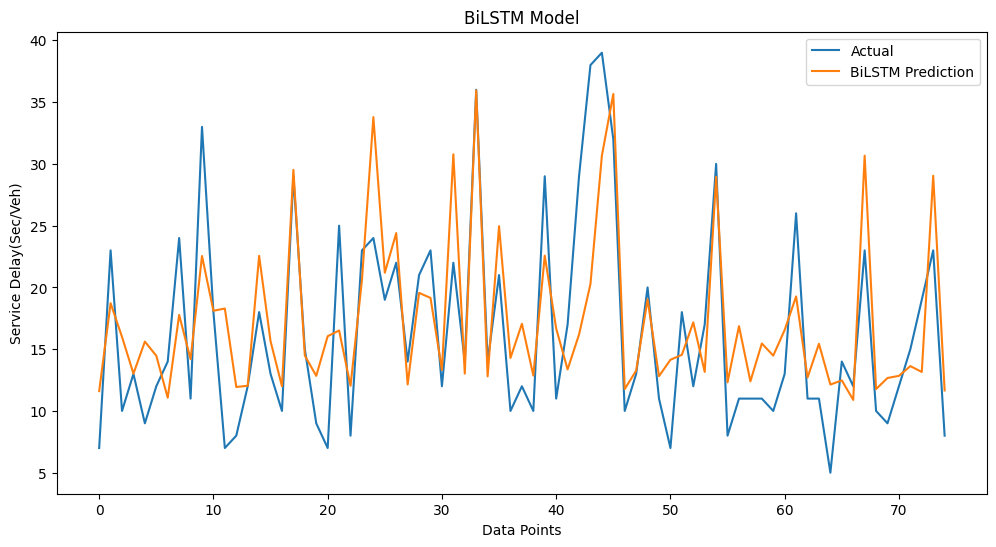

In [400]:
print(r2_bilstm)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_bilstm, label='BiLSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay(Sec/Veh)')
plt.legend()
plt.title('BiLSTM Model')
plt.show()

In [382]:
def create_gru_model():
    model = Sequential()
    model.add(GRU(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True))
    model.add(GRU(48, activation='relu', return_sequences=False))  
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

gru_model = create_gru_model()
gru_model.fit(X_train_lstm, y_train, epochs=200, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_gru = gru_model.predict(X_test_lstm)
mae_gru = mean_absolute_error(y_test, y_pred_gru)
mse_gru = mean_squared_error(y_test, y_pred_gru)
rmse_gru=np.sqrt(mse_gru)
r2_gru = r2_score(y_test, y_pred_gru)

Epoch 1/200
27/27 [==============================] - 2s 14ms/step - loss: 302.6996 - val_loss: 288.6003
Epoch 2/200
27/27 [==============================] - 0s 4ms/step - loss: 132.1418 - val_loss: 46.7845
Epoch 3/200
27/27 [==============================] - 0s 4ms/step - loss: 43.4472 - val_loss: 40.5082
Epoch 4/200
27/27 [==============================] - 0s 5ms/step - loss: 39.3252 - val_loss: 41.9981
Epoch 5/200
27/27 [==============================] - 0s 4ms/step - loss: 38.0367 - val_loss: 38.7275
Epoch 6/200
27/27 [==============================] - 0s 5ms/step - loss: 37.2224 - val_loss: 38.2498
Epoch 7/200
27/27 [==============================] - 0s 4ms/step - loss: 37.4157 - val_loss: 37.9812
Epoch 8/200
27/27 [==============================] - 0s 4ms/step - loss: 37.0814 - val_loss: 39.2810
Epoch 9/200
27/27 [==============================] - 0s 4ms/step - loss: 38.2327 - val_loss: 37.0337
Epoch 10/200
27/27 [==============================] - 0s 5ms/step - loss: 37.3942 - val

Visualize GRU results

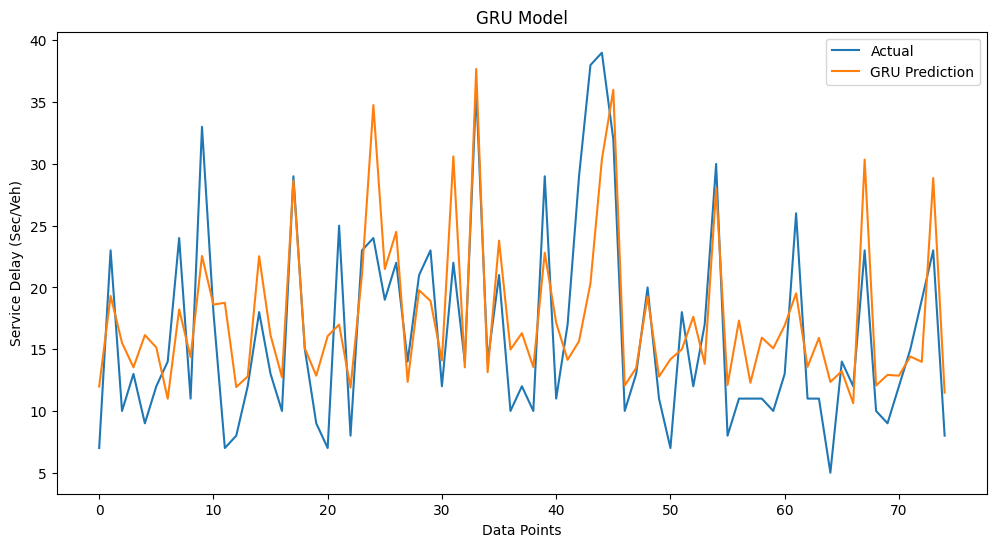

In [383]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_gru, label='GRU Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('GRU Model')
plt.show()

In [384]:
def create_bigru_model():
    model = Sequential()
    model.add(Bidirectional(GRU(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True)))
    model.add(Bidirectional(GRU(48, activation='relu', return_sequences=False))) 
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

bigru_model = create_bigru_model()
bigru_model.fit(X_train_lstm, y_train, epochs=200, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_bigru = bigru_model.predict(X_test_lstm)
mae_bigru = mean_absolute_error(y_test, y_pred_bigru)
mse_bigru = mean_squared_error(y_test, y_pred_bigru)
rmse_bigru=np.sqrt(mse_bigru)
r2_bigru = r2_score(y_test, y_pred_bigru)

Epoch 1/200
27/27 [==============================] - 4s 22ms/step - loss: 290.3916 - val_loss: 233.6524
Epoch 2/200
27/27 [==============================] - 0s 8ms/step - loss: 78.0536 - val_loss: 40.2341
Epoch 3/200
27/27 [==============================] - 0s 5ms/step - loss: 35.7407 - val_loss: 28.8423
Epoch 4/200
27/27 [==============================] - 0s 5ms/step - loss: 31.9477 - val_loss: 27.5462
Epoch 5/200
27/27 [==============================] - 0s 5ms/step - loss: 30.2009 - val_loss: 28.4653
Epoch 6/200
27/27 [==============================] - 0s 5ms/step - loss: 30.6618 - val_loss: 26.4529
Epoch 7/200
27/27 [==============================] - 0s 5ms/step - loss: 30.9553 - val_loss: 30.3714
Epoch 8/200
27/27 [==============================] - 0s 5ms/step - loss: 31.4038 - val_loss: 27.8636
Epoch 9/200
27/27 [==============================] - 0s 5ms/step - loss: 31.3712 - val_loss: 27.4900
Epoch 10/200
27/27 [==============================] - 0s 4ms/step - loss: 31.2315 - val_

Visualize BiGRU results

0.5638737032006675


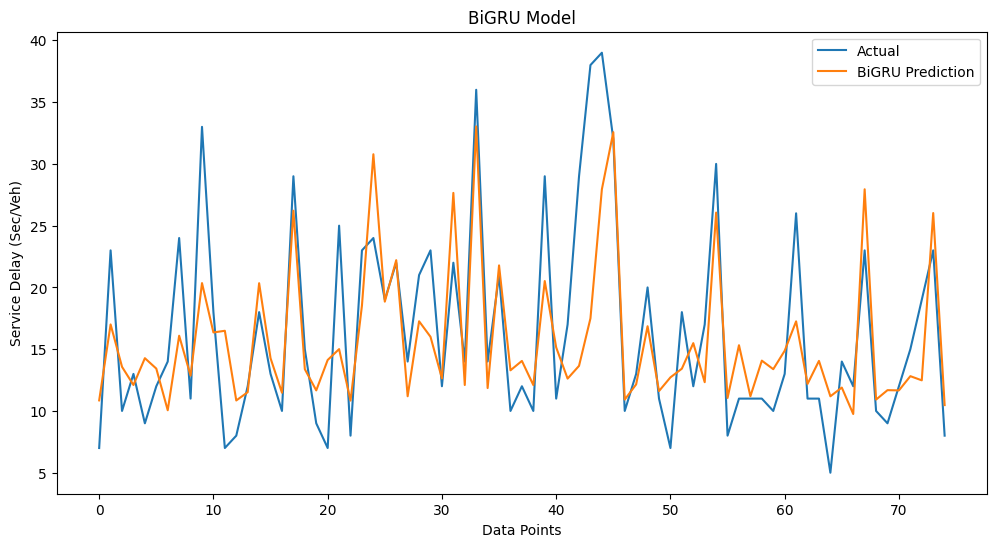

In [385]:
print(r2_bigru)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_bigru, label='BiGRU Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('BiGRU Model')
plt.show()

In [386]:
def create_cnn_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_model = create_cnn_model()
cnn_model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_train, epochs=200, batch_size=16, validation_data=(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test), verbose=1)

y_pred_cnn = cnn_model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))
mae_cnn = mean_absolute_error(y_test, y_pred_cnn)
mse_cnn = mean_squared_error(y_test, y_pred_cnn)
rmse_cnn=np.sqrt(mse_cnn)
r2_cnn = r2_score(y_test, y_pred_cnn)

Epoch 1/200
27/27 [==============================] - 1s 7ms/step - loss: 302.3826 - val_loss: 297.2737
Epoch 2/200
27/27 [==============================] - 0s 3ms/step - loss: 236.0970 - val_loss: 177.4657
Epoch 3/200
27/27 [==============================] - 0s 3ms/step - loss: 97.0632 - val_loss: 40.1204
Epoch 4/200
27/27 [==============================] - 0s 3ms/step - loss: 35.1154 - val_loss: 34.1240
Epoch 5/200
27/27 [==============================] - 0s 2ms/step - loss: 34.8216 - val_loss: 33.0752
Epoch 6/200
27/27 [==============================] - 0s 3ms/step - loss: 33.9448 - val_loss: 32.0494
Epoch 7/200
27/27 [==============================] - 0s 2ms/step - loss: 33.2538 - val_loss: 31.3930
Epoch 8/200
27/27 [==============================] - 0s 2ms/step - loss: 32.8286 - val_loss: 30.5831
Epoch 9/200
27/27 [==============================] - 0s 3ms/step - loss: 32.5056 - val_loss: 30.1637
Epoch 10/200
27/27 [==============================] - 0s 3ms/step - loss: 32.2577 - val

Visualize CNN results

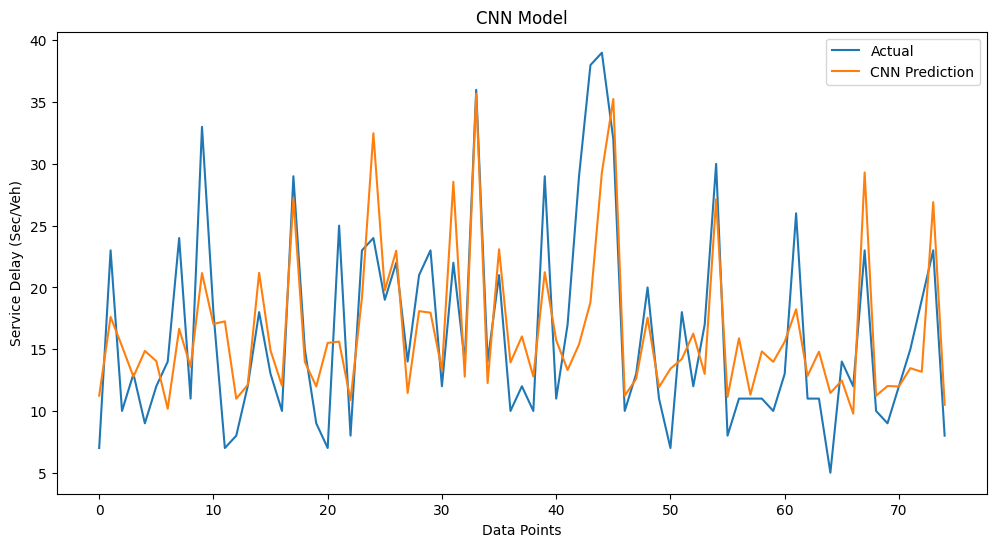

In [387]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn, label='CNN Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN Model')
plt.show()

In [388]:
def create_cnn_lstm_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_lstm_model = create_cnn_lstm_model()
cnn_lstm_model.fit(X_train_lstm, y_train, epochs=200, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_cnn_lstm = cnn_lstm_model.predict(X_test_lstm)
mae_cnn_lstm = mean_absolute_error(y_test, y_pred_cnn_lstm)
mse_cnn_lstm = mean_squared_error(y_test, y_pred_cnn_lstm)
rmse_cnn_lstm=np.sqrt(mse_cnn_lstm)
r2_cnn_lstm = r2_score(y_test, y_pred_cnn_lstm)

Epoch 1/200
27/27 [==============================] - 2s 14ms/step - loss: 304.1462 - val_loss: 301.7879
Epoch 2/200
27/27 [==============================] - 0s 4ms/step - loss: 195.3739 - val_loss: 44.4352
Epoch 3/200
27/27 [==============================] - 0s 5ms/step - loss: 40.9643 - val_loss: 35.6817
Epoch 4/200
27/27 [==============================] - 0s 4ms/step - loss: 35.5662 - val_loss: 33.2909
Epoch 5/200
27/27 [==============================] - 0s 4ms/step - loss: 33.4527 - val_loss: 31.4790
Epoch 6/200
27/27 [==============================] - 0s 4ms/step - loss: 32.8976 - val_loss: 31.1415
Epoch 7/200
27/27 [==============================] - 0s 4ms/step - loss: 31.9130 - val_loss: 30.5683
Epoch 8/200
27/27 [==============================] - 0s 3ms/step - loss: 32.1616 - val_loss: 30.4667
Epoch 9/200
27/27 [==============================] - 0s 4ms/step - loss: 31.3609 - val_loss: 29.6912
Epoch 10/200
27/27 [==============================] - 0s 4ms/step - loss: 31.9946 - val

Visualize CNN_LSTM results

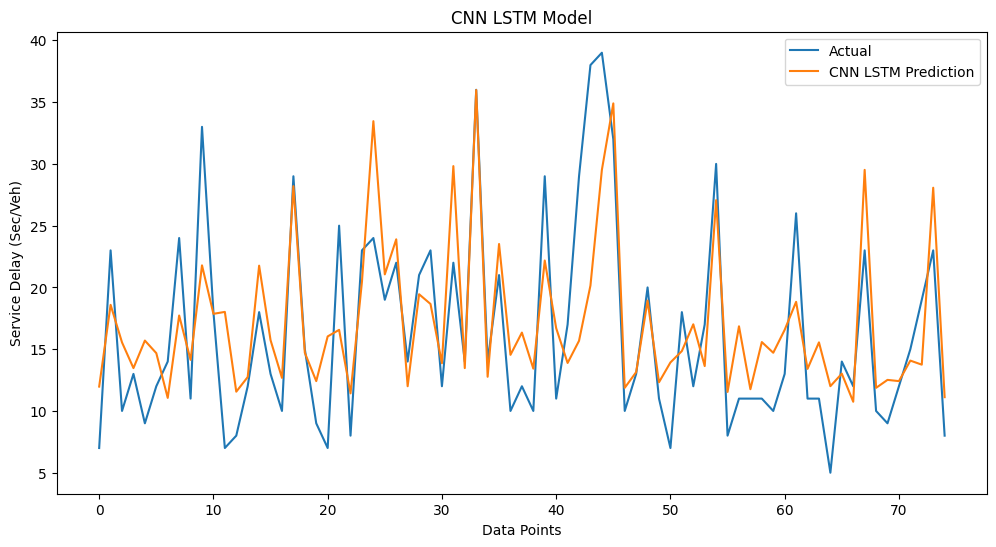

In [389]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn_lstm, label='CNN LSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN LSTM Model')
plt.show()

In [390]:
def create_cnn_bilstm_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Bidirectional(LSTM(50, activation='relu')))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_bilstm_model = create_cnn_bilstm_model()
cnn_bilstm_model.fit(X_train_lstm, y_train, epochs=200, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_cnn_bilstm = cnn_bilstm_model.predict(X_test_lstm)
mae_cnn_bilstm = mean_absolute_error(y_test, y_pred_cnn_bilstm)
mse_cnn_bilstm = mean_squared_error(y_test, y_pred_cnn_bilstm)
rmse_cnn_bilstm=np.sqrt(mse_cnn_bilstm)
r2_cnn_bilstm = r2_score(y_test, y_pred_cnn_bilstm)

Epoch 1/200
27/27 [==============================] - 2s 14ms/step - loss: 303.9075 - val_loss: 297.8841
Epoch 2/200
27/27 [==============================] - 0s 4ms/step - loss: 179.8329 - val_loss: 45.7499
Epoch 3/200
27/27 [==============================] - 0s 4ms/step - loss: 41.3076 - val_loss: 30.7197
Epoch 4/200
27/27 [==============================] - 0s 4ms/step - loss: 33.3820 - val_loss: 27.9238
Epoch 5/200
27/27 [==============================] - 0s 3ms/step - loss: 31.0743 - val_loss: 27.4118
Epoch 6/200
27/27 [==============================] - 0s 4ms/step - loss: 30.6100 - val_loss: 27.1376
Epoch 7/200
27/27 [==============================] - 0s 5ms/step - loss: 30.5196 - val_loss: 27.6735
Epoch 8/200
27/27 [==============================] - 0s 4ms/step - loss: 30.0073 - val_loss: 28.1571
Epoch 9/200
27/27 [==============================] - 0s 4ms/step - loss: 30.0316 - val_loss: 28.2016
Epoch 10/200
27/27 [==============================] - 0s 3ms/step - loss: 30.1856 - val

Visualize CNN_BiLSTM results

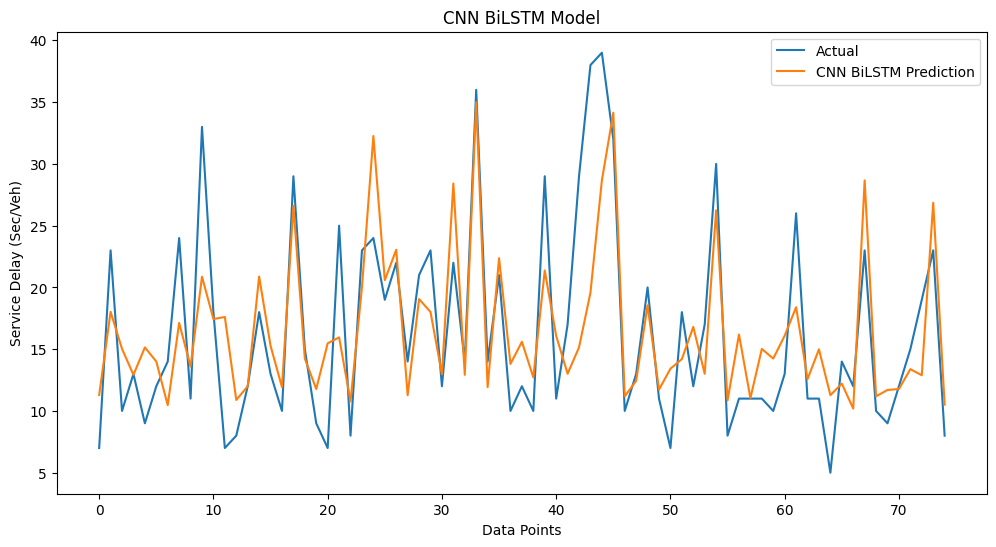

In [391]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn_bilstm, label='CNN BiLSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN BiLSTM Model')
plt.show()

Visualize metrics

In [392]:
models = ['LSTM', 'BiLSTM', 'GRU', 'BiGRU', 'CNN', 'CNNLSTM', 'CNN Bilstm']
mae_values = [mae_lstm, mae_bilstm, mae_gru, mae_bigru, mae_cnn, mae_cnn_lstm, mae_cnn_bilstm]
mse_values = [rmse_lstm, rmse_bilstm, rmse_gru, rmse_bigru, rmse_cnn, rmse_cnn_lstm, rmse_cnn_bilstm]
r2_values = [r2_lstm, r2_bilstm, r2_gru, r2_bigru, r2_cnn, r2_cnn_lstm, r2_cnn_bilstm]

Plot MAE

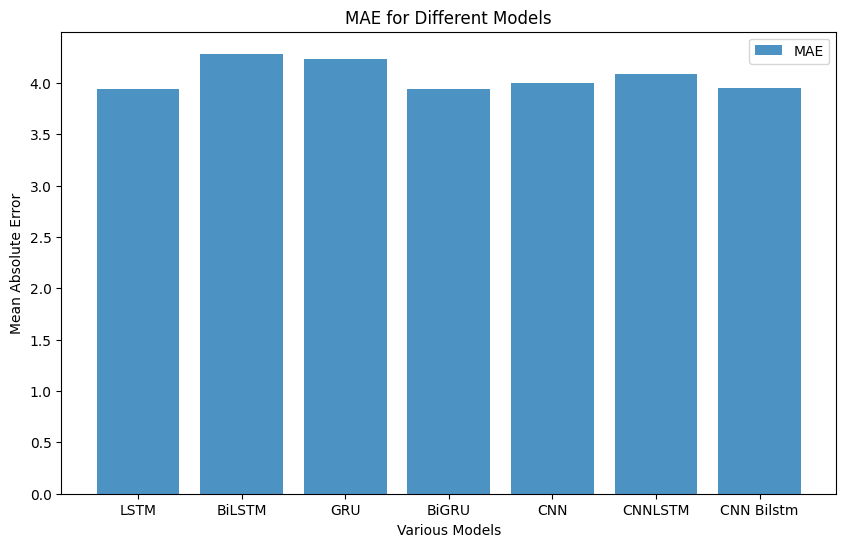

In [393]:
plt.figure(figsize=(10, 6))
plt.bar(models, mae_values, alpha=0.8, label='MAE')
plt.title('MAE for Different Models')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Various Models')
plt.legend()
plt.show()

Plot MSE

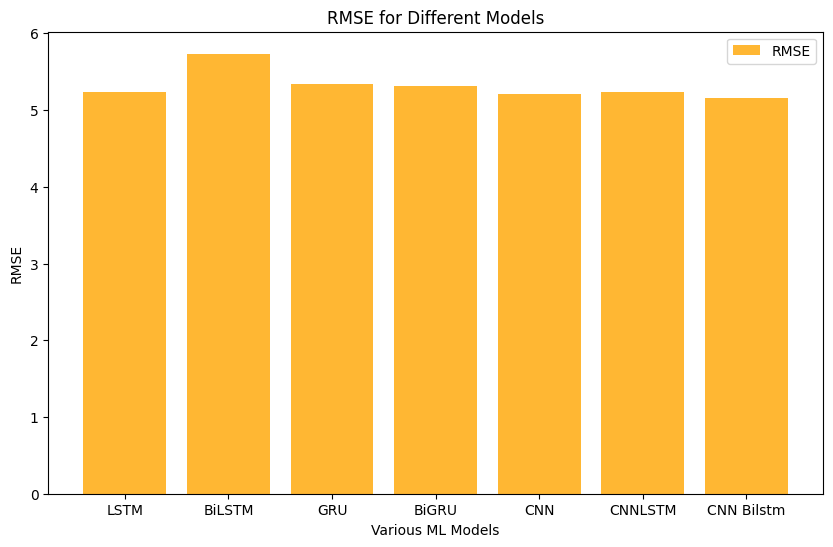

In [394]:
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, alpha=0.8, label='RMSE', color='orange')
plt.title('RMSE for Different Models')
plt.ylabel('RMSE')
plt.xlabel('Various ML Models')
plt.legend()
plt.show()

Plot R2 Score

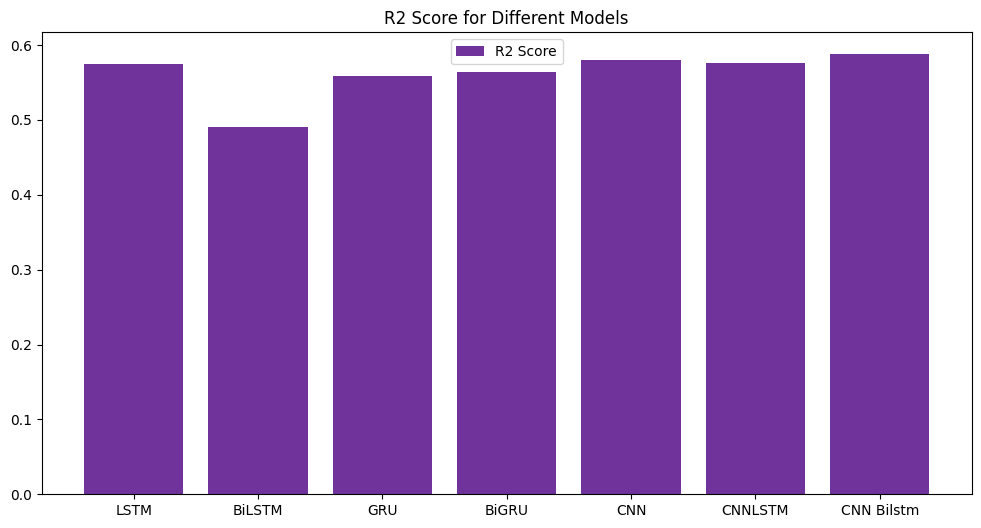

In [395]:
plt.figure(figsize=(12, 6))
plt.bar(models, r2_values, alpha=0.8, label='R2 Score', color='indigo')
plt.title('R2 Score for Different Models')
plt.legend()
plt.show()

Print Metrics

In [396]:
print("LSTM MAE:", mae_lstm)
print("LSTM MSE:", rmse_lstm)
print("LSTM R2 Score:", r2_lstm)
print(end="\n")
print("BiLSTM MAE:", mae_bilstm)
print("BiLSTM MSE:", rmse_bilstm)
print("BiLSTM R2 Score:", r2_bilstm)
print(end="\n")
print("GRU MAE:", mae_gru)
print("GRU MSE:", rmse_gru)
print("GRU R2 Score:", r2_gru)
print(end="\n")
print("BiGRU MAE:", mae_bigru)
print("BiGRU MSE:", rmse_bigru)
print("BiGRU R2 Score:", r2_bigru)
print(end="\n")
print("CNN MAE:", mae_cnn)
print("CNN MSE:", rmse_cnn)
print("CNN R2 Score:", r2_cnn)
print(end="\n")
print("CNN LSTM MAE:", mae_cnn_lstm)
print("CNN LSTM MSE:", rmse_cnn_lstm)
print("CNN LSTM R2 Score:", r2_cnn_lstm)
print(end="\n")
print("CNN BiLSTM MAE:", mae_cnn_bilstm)
print("CNN BiLSTM MSE:", rmse_cnn_bilstm)
print("CNN BiLSTM R2 Score:", r2_cnn_bilstm)

LSTM MAE: 3.941585413614909
LSTM MSE: 5.239052809370018
LSTM R2 Score: 0.5751379537503323

BiLSTM MAE: 4.284776496887207
BiLSTM MSE: 5.7337000561432605
BiLSTM R2 Score: 0.4911235831497268

GRU MAE: 4.23200501759847
GRU MSE: 5.341721316334966
GRU R2 Score: 0.558322945917666

BiGRU MAE: 3.940738703409831
BiGRU MSE: 5.308049262966412
BiGRU R2 Score: 0.5638737032006675

CNN MAE: 4.000552317301432
CNN MSE: 5.205482856830697
CNN R2 Score: 0.580565234009826

CNN LSTM MAE: 4.0872869873046875
CNN LSTM MSE: 5.2300471381216935
CNN LSTM R2 Score: 0.5765973318315725

CNN BiLSTM MAE: 3.9478192647298176
CNN BiLSTM MSE: 5.161446876530962
CNN BiLSTM R2 Score: 0.5876316663961956


Plot predictions for each model

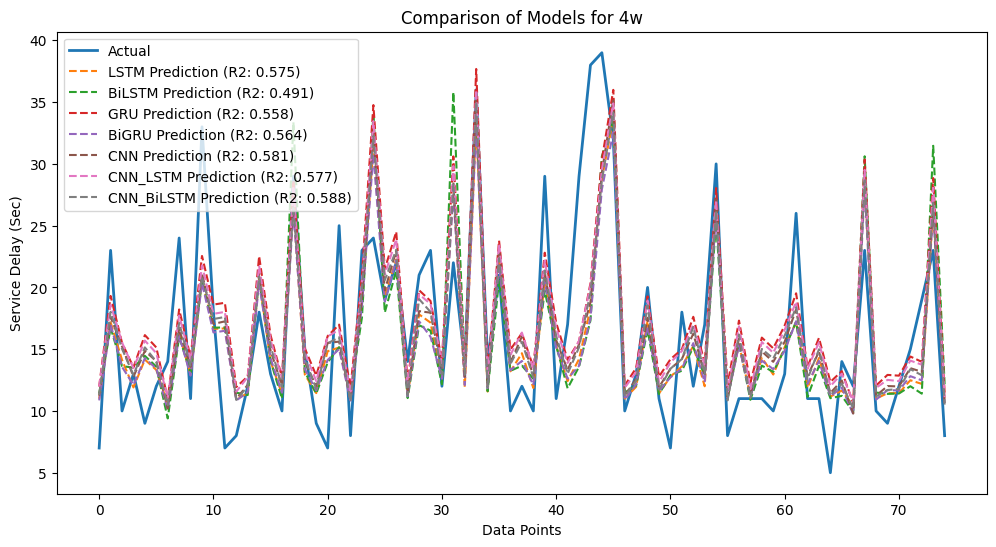

In [397]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', linewidth=2)
plt.plot(y_pred_lstm, label=f'LSTM Prediction (R2: {r2_lstm:.3f})', linestyle='dashed')
plt.plot(y_pred_bilstm, label=f'BiLSTM Prediction (R2: {r2_bilstm:.3f})', linestyle='dashed')
plt.plot(y_pred_gru, label=f'GRU Prediction (R2: {r2_gru:.3f})', linestyle='dashed')
plt.plot(y_pred_bigru, label=f'BiGRU Prediction (R2: {r2_bigru:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn, label=f'CNN Prediction (R2: {r2_cnn:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn_lstm, label=f'CNN_LSTM Prediction (R2: {r2_cnn_lstm:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn_bilstm, label=f'CNN_BiLSTM Prediction (R2: {r2_cnn_bilstm:.3f})', linestyle='dashed')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec)')
plt.legend()
plt.title('Comparison of Models for 4w')
plt.show()

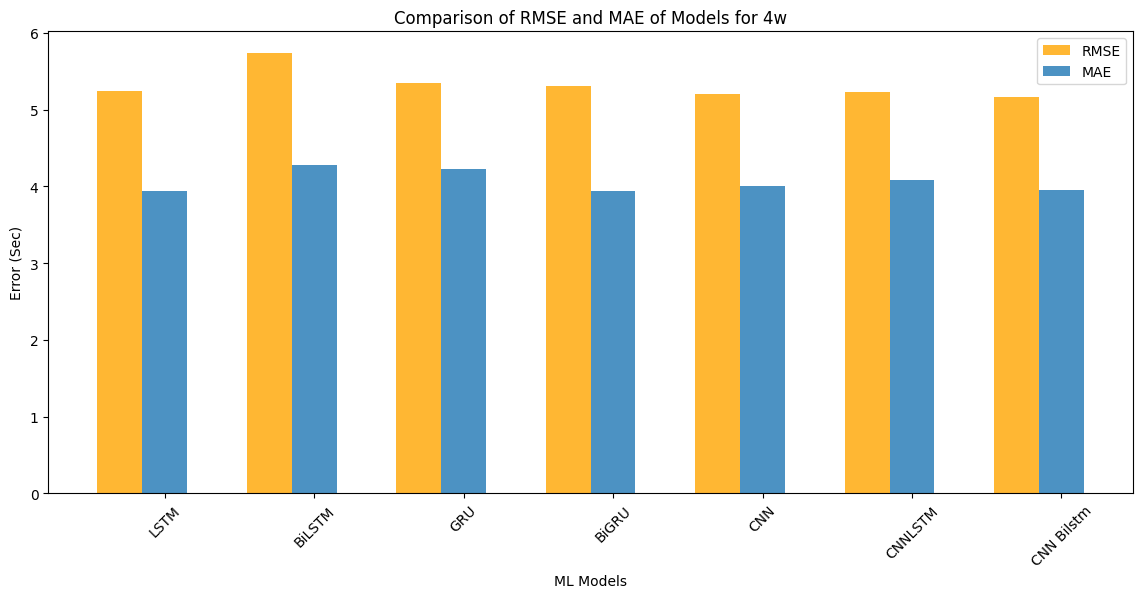

In [398]:
models = ['LSTM', 'BiLSTM', 'GRU', 'BiGRU', 'CNN', 'CNNLSTM', 'CNN Bilstm']
mae_values = [mae_lstm, mae_bilstm, mae_gru, mae_bigru, mae_cnn, mae_cnn_lstm, mae_cnn_bilstm]
mse_values = [rmse_lstm, rmse_bilstm, rmse_gru, rmse_bigru, rmse_cnn, rmse_cnn_lstm, rmse_cnn_bilstm]
r2_values = [r2_lstm, r2_bilstm, r2_gru, r2_bigru, r2_cnn, r2_cnn_lstm, r2_cnn_bilstm]

bar_width = 0.3
index = np.arange(len(models))

plt.figure(figsize=(14, 6))

# Plot MSE
plt.bar(index, mse_values, width=bar_width, alpha=0.8, label='RMSE', color='orange')

# Plot MAE
plt.bar(index + bar_width, mae_values, width=bar_width, alpha=0.8, label='MAE')

# Plot R2
#plt.bar(index + 2*bar_width, r2_values, width=bar_width, alpha=0.8, label='R2')

plt.xlabel('ML Models')
plt.ylabel('Error (Sec)')
plt.title('Comparison of RMSE and MAE of Models for 4w')
plt.xticks(index + bar_width, models, rotation=45)
plt.legend()

plt.show()